In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import the data:

In [2]:
train_data = "data/train.csv"
test_data = "data/test.csv"

titanic_train_data = pd.read_csv(train_data)
titanic_test_data = pd.read_csv(test_data)

Inspecting the data:

In [3]:
titanic_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic_train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic_train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
titanic_train_data.shape

(891, 12)

In [8]:
# num values -> understand through histograms
df_num = titanic_train_data[['Age', 'SibSp', 'Parch', 'Fare']] 

# categorical values -> understand through value counts
df_cat = titanic_train_data[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]

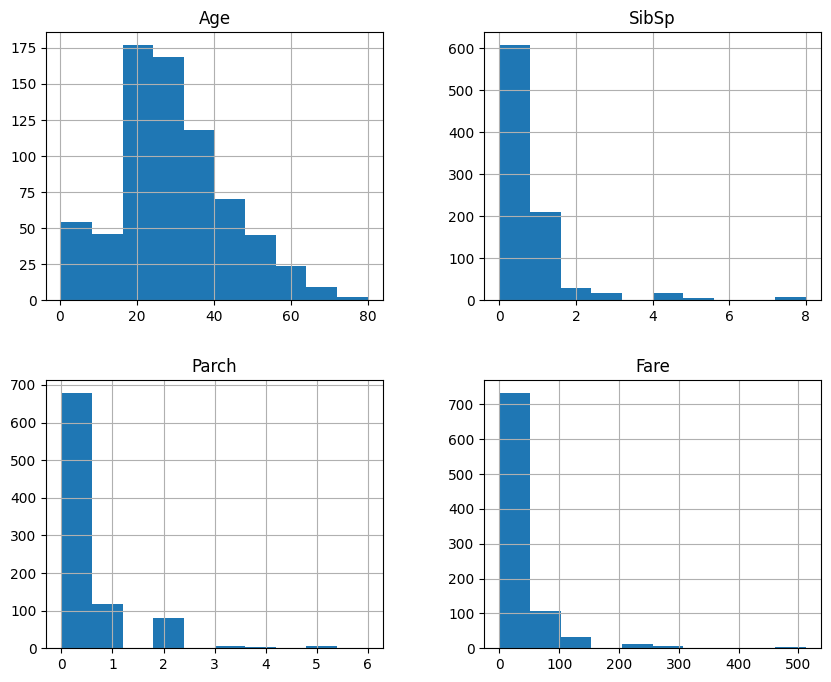

In [9]:
# distribution of numerical features
df_num.hist(figsize=(10, 8))
plt.show()


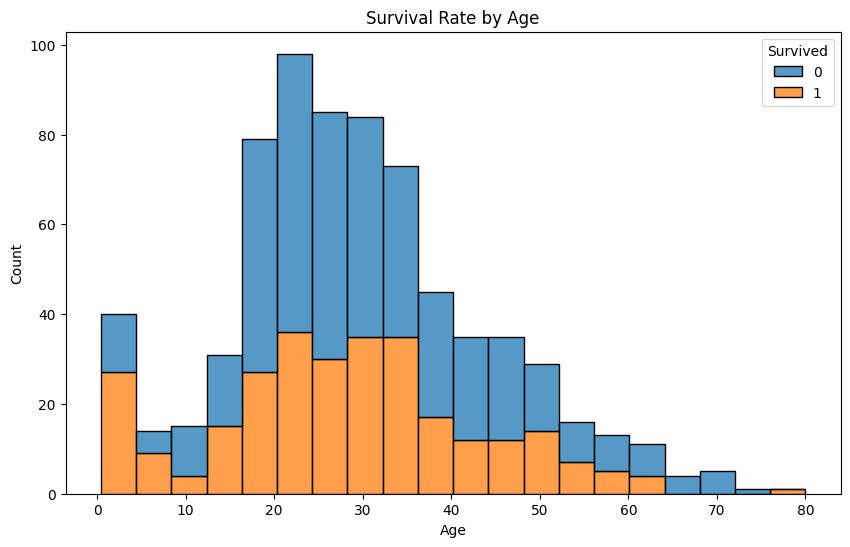

In [10]:
# survival rate across Age, SibSp, Parch, Fare
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_train_data, x='Age', hue='Survived', multiple='stack')
plt.title('Survival Rate by Age')
plt.show()

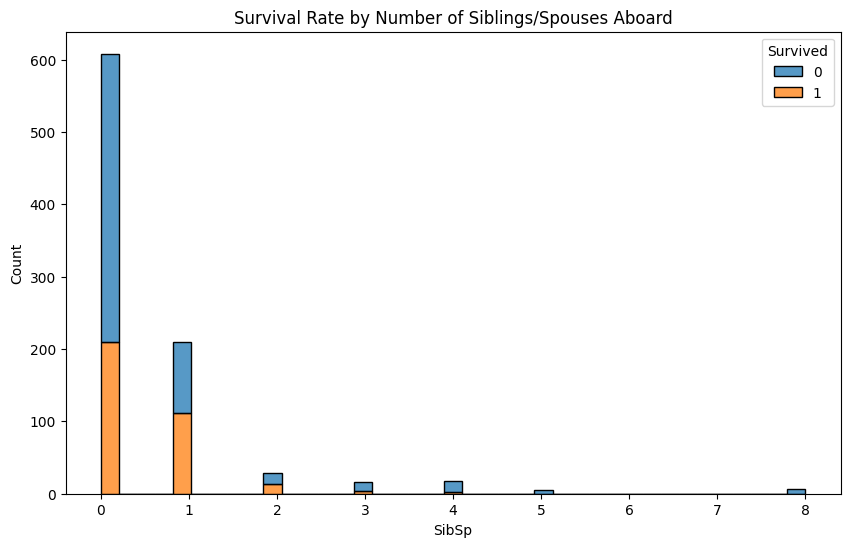

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_train_data, x='SibSp', hue='Survived', multiple='stack')
plt.title('Survival Rate by Number of Siblings/Spouses Aboard')
plt.show()


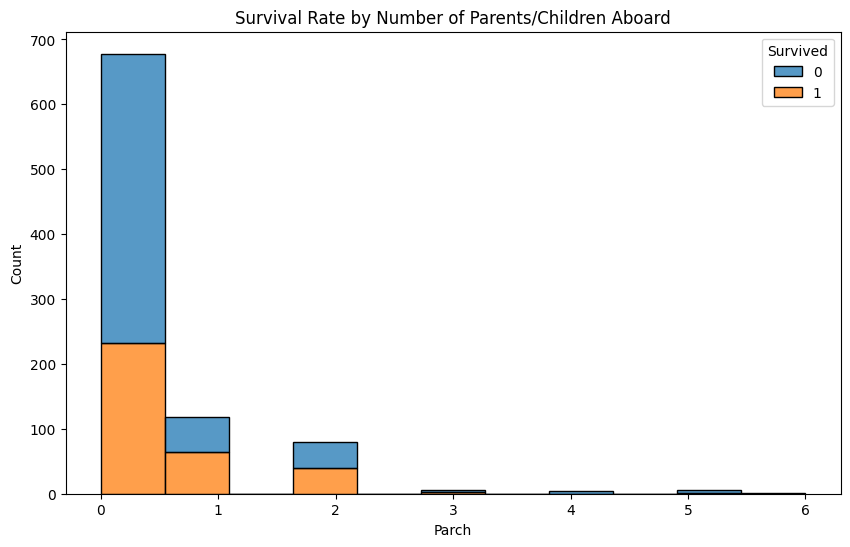

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_train_data, x='Parch', hue='Survived', multiple='stack')
plt.title('Survival Rate by Number of Parents/Children Aboard')
plt.show()

<Axes: xlabel='Fare', ylabel='Count'>

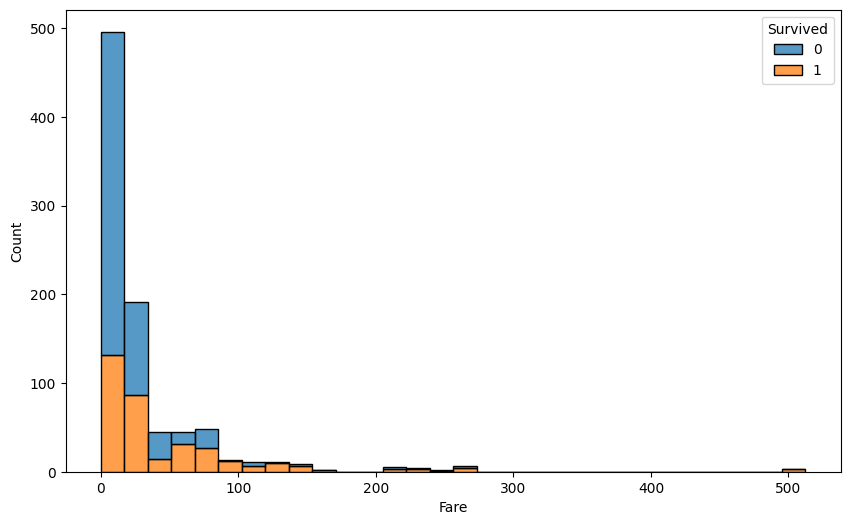

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_train_data, x='Fare', hue='Survived', multiple='stack', bins=30)

In [14]:
pd.pivot_table(titanic_train_data, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


Summary from above:

People who survived:
- Slightly younger
- Paid more (1st or 2nd class)
- Had slightly more parents/children aboard

In [15]:
# plotting categorical 
for col in df_cat.columns:
    print(f"Value counts for {col}:\n{titanic_train_data[col].value_counts()}\n")

Value counts for Survived:
Survived
0    549
1    342
Name: count, dtype: int64

Value counts for Pclass:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Value counts for Sex:
Sex
male      577
female    314
Name: count, dtype: int64

Value counts for Ticket:
Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

Value counts for Cabin:
Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

Value counts for Embarked:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64



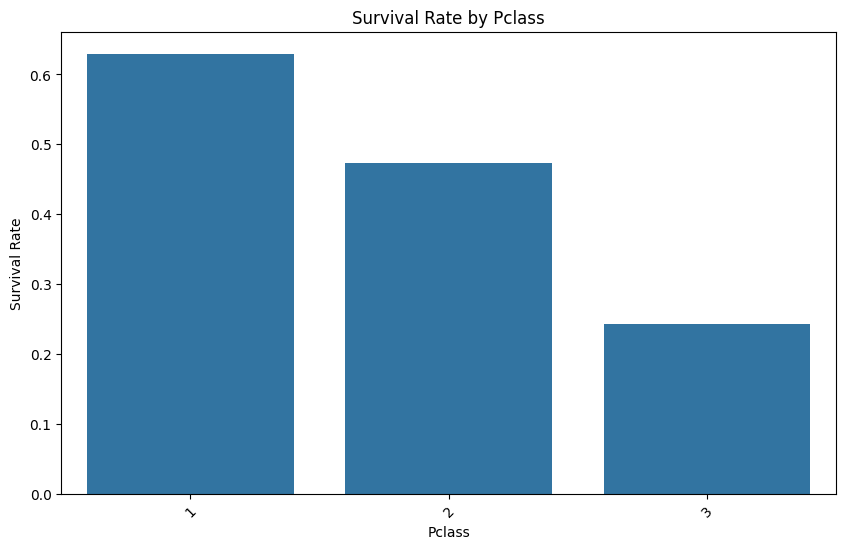

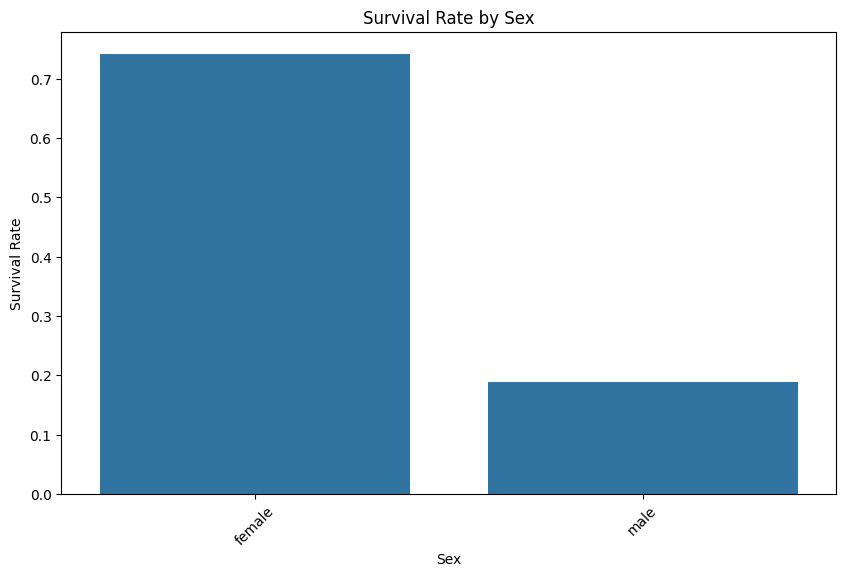

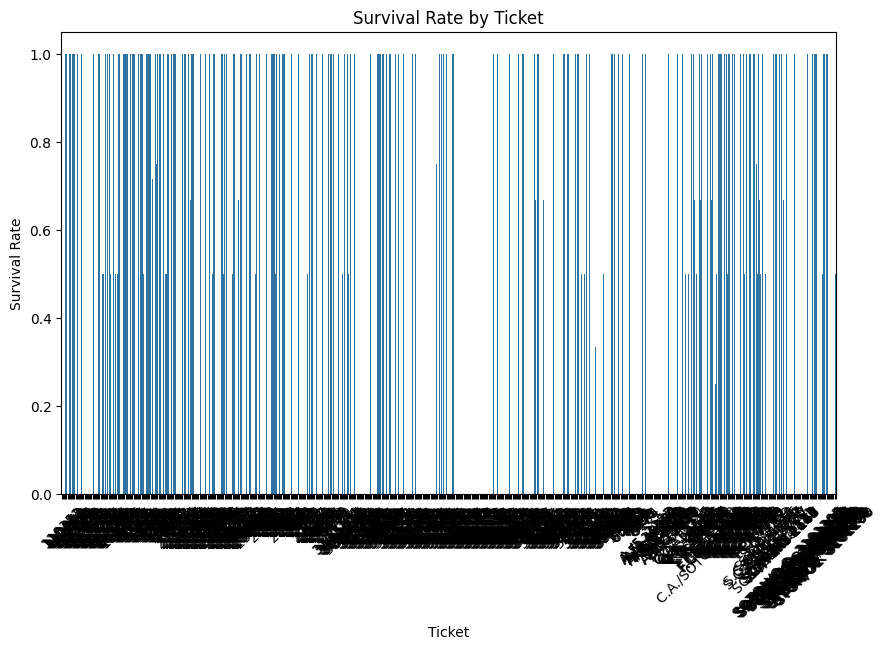

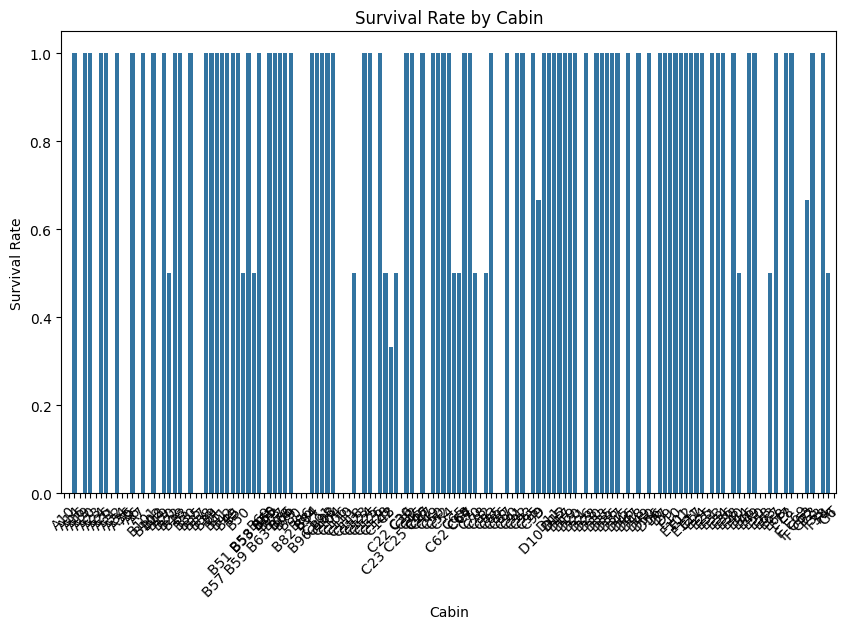

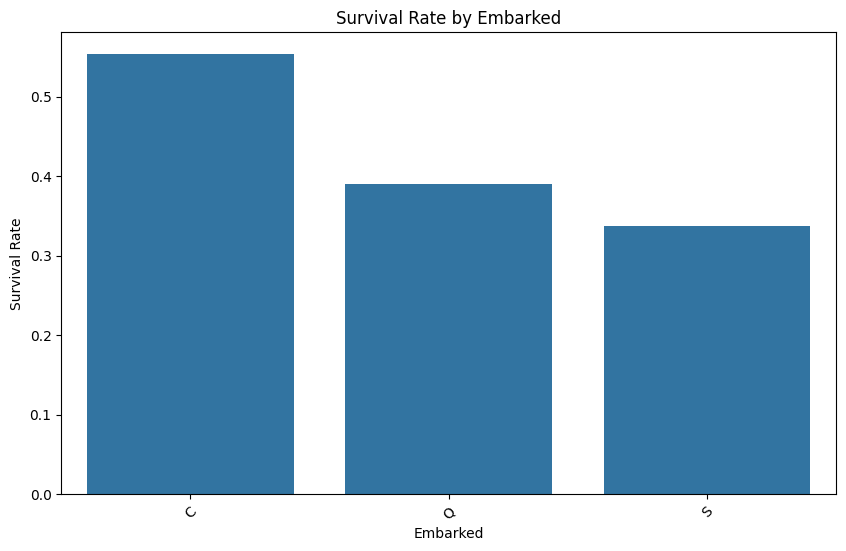

In [16]:
# comparing survival and each of the categorical features
for col in df_cat.columns:
    if col == 'Survived':
        continue

    survival_rate = titanic_train_data.groupby(col)['Survived'].mean()
    plt.figure(figsize=(10, 6)) 
    sns.barplot(x=survival_rate.index, y=survival_rate.values)
    plt.title(f'Survival Rate by {col}')
    plt.xlabel(col)
    plt.ylabel('Survival Rate')
    plt.xticks(rotation=45)
    plt.show()


People who survived:
- First class passengers (Pclass=1) had higher survival rates
- Females survived more than males
- Passengers who embarked from Cherbourg (Embarked=C) survived more

Checking missing values:

In [17]:
titanic_train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
titanic_train_data['Age'] = titanic_train_data['Age'].fillna(titanic_train_data['Age'].median())
titanic_train_data['Embarked'] = titanic_train_data['Embarked'].fillna(titanic_train_data['Embarked'].mode()[0])

In [19]:
titanic_train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Feature Engineering:

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier



In [21]:
# FamilySize = SibSp + Parch + 1
titanic_train_data['FamilySize'] = titanic_train_data['SibSp'] + titanic_train_data['Parch'] + 1

In [22]:
# IsAlone = 1 if FamilySize == 1, else 0
titanic_train_data['IsAlone'] = (titanic_train_data['FamilySize'] == 1).astype(int)


In [23]:
# Extract titles from names
titanic_train_data['Title'] = titanic_train_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
print(titanic_train_data[['Name', 'Title']].head(10))

                                                Name   Title
0                            Braund, Mr. Owen Harris      Mr
1  Cumings, Mrs. John Bradley (Florence Briggs Th...     Mrs
2                             Heikkinen, Miss. Laina    Miss
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)     Mrs
4                           Allen, Mr. William Henry      Mr
5                                   Moran, Mr. James      Mr
6                            McCarthy, Mr. Timothy J      Mr
7                     Palsson, Master. Gosta Leonard  Master
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)     Mrs
9                Nasser, Mrs. Nicholas (Adele Achem)     Mrs


In [24]:
print(titanic_train_data['Title'].value_counts())


Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64


In [25]:
# Group the remaining titles into 'Rare'
title_counts = titanic_train_data['Title'].value_counts()
rare_titles = title_counts[title_counts < 10].index
titanic_train_data['Title'] = titanic_train_data['Title'].replace(rare_titles, 'Rare')

In [26]:
print(titanic_train_data['Title'].value_counts())

Title
Mr        517
Miss      182
Mrs       125
Master     40
Rare       27
Name: count, dtype: int64


In [27]:
# Map titles to numerical values
title_mapping = { 'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Rare': 4 }
titanic_train_data['Title'] = titanic_train_data['Title'].map(title_mapping)
print(titanic_train_data[['Name', 'Title']].head(10))

                                                Name  Title
0                            Braund, Mr. Owen Harris      0
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      2
2                             Heikkinen, Miss. Laina      1
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      2
4                           Allen, Mr. William Henry      0
5                                   Moran, Mr. James      0
6                            McCarthy, Mr. Timothy J      0
7                     Palsson, Master. Gosta Leonard      3
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)      2
9                Nasser, Mrs. Nicholas (Adele Achem)      2


In [28]:
labels = ['Child', 'Teen', 'Adult', 'MiddleAge', 'Senior']
titanic_train_data['AgeBin'] = pd.cut(titanic_train_data['Age'], bins=[0, 12, 20, 40, 60, 80], labels=labels)

In [29]:
fare_labels = ['Low', 'Medium', 'High', 'Very_High']
titanic_train_data['FareBin'] = pd.qcut(titanic_train_data['Fare'], 4, labels=fare_labels)

In [30]:
titanic_train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize', 'IsAlone',
       'Title', 'AgeBin', 'FareBin'],
      dtype='object')

In [31]:
# Drop unnecessary columns
titanic_train_data.drop(['PassengerId', 'Name', 'Cabin', 'SibSp', 'Parch', 'Age', 'Fare', 'Ticket'], axis=1, inplace=True)

In [32]:
titanic_train_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Embarked', 'FamilySize', 'IsAlone',
       'Title', 'AgeBin', 'FareBin'],
      dtype='object')

In [33]:
# Define categorical and numerical features
categorical_cols = ['Sex', 'Title', 'AgeBin', 'FareBin', 'Embarked', 'Pclass']
numerical_cols = ['FamilySize', 'IsAlone']

In [34]:
# Prepare features and target
X = titanic_train_data[categorical_cols + numerical_cols]
y = titanic_train_data['Survived']

In [35]:
# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='if_binary'), categorical_cols)
    ]
)

In [37]:
models = {
    "Logistic Regression": LogisticRegression(random_state=100),
    "Random Forest": RandomForestClassifier(random_state=100),
    "Gradient Boosting": GradientBoostingClassifier(random_state=100),
    "SVM": SVC(random_state=100),
    "Decision Tree": DecisionTreeClassifier(random_state=100),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Extra Trees": ExtraTreesClassifier(random_state=100),
}


In [38]:
results = {}
confusion_matrix_results = {}


In [39]:
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Train the pipeline
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_val)
    
    results[name] = {
        "Recall": recall_score(y_val, y_pred),
        "Precision": precision_score(y_val, y_pred),
        "F1 Score": f1_score(y_val, y_pred),
        "Accuracy": pipeline.score(X_val, y_val)
    }
    
    confusion_matrix_results[name] = confusion_matrix(y_val, y_pred)
    
    print(f"Model: {name}")
    print(classification_report(y_val, y_pred))
    print("=====================================")

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       105
           1       0.77      0.77      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Model: Random Forest
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       105
           1       0.79      0.78      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

Model: Gradient Boosting
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
w

In [40]:
# this tells GridSearchCV which hyperparameters to test for the Random Forest model
rf_param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 5, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}


In [41]:
# similar for knn
knn_param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan']
}


In [42]:
from sklearn.impute import SimpleImputer, KNNImputer
# create pipeline for each 
rf_pipeline = Pipeline(steps=[
    # add imputer
    ('preprocessor', preprocessor),
    # ('imputer', KNNImputer(n_neighbors=5)),
    ('classifier', RandomForestClassifier(random_state=100))
])


In [43]:
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

In [44]:
# run GridSearchCV 
rf_grid = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, scoring='f1', n_jobs=-1)
rf_grid.fit(X_train, y_train)

,estimator,Pipeline(step..._state=100))])
,param_grid,"{'classifier__bootstrap': [True, False], 'classifier__max_depth': [None, 5, ...], 'classifier__min_samples_leaf': [1, 2, ...], 'classifier__min_samples_split': [2, 5, ...], ...}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [45]:
rf_best_pred = rf_grid.predict(X_val)
print(classification_report(y_val, rf_best_pred))


              precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



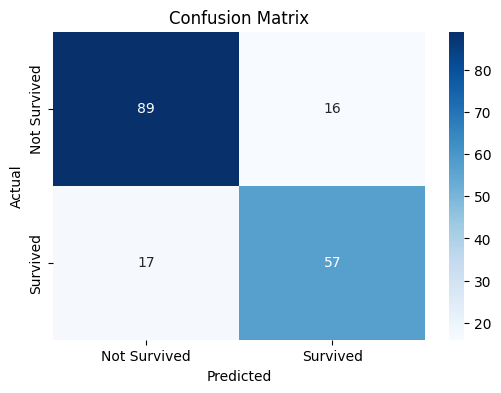

In [46]:
cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [47]:
best_rf = pipeline.named_steps['classifier']


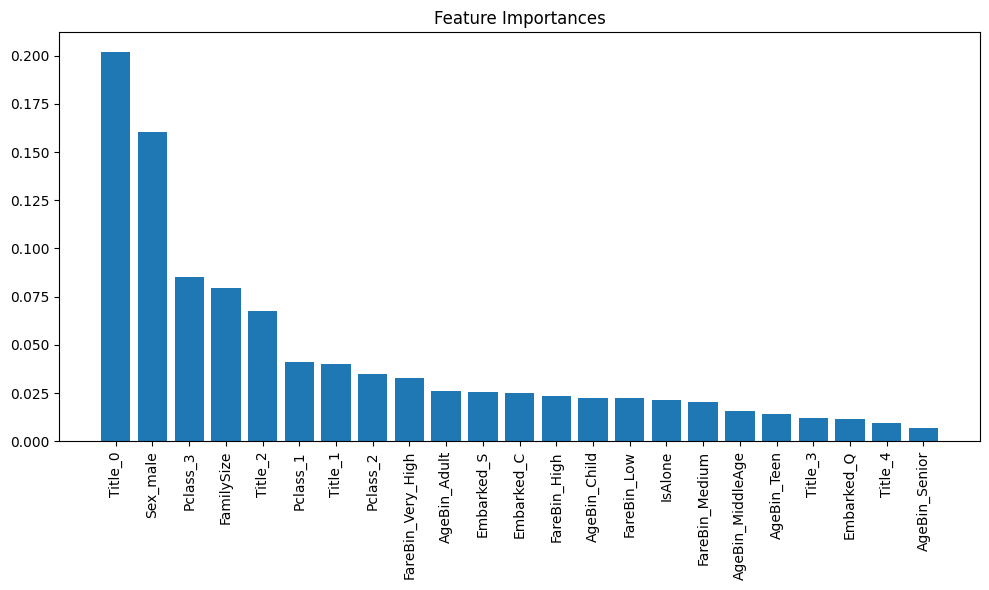

In [48]:
# Step 1: Get feature names from the preprocessor
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_features = np.concatenate([numerical_cols, cat_features])

# Step 2: Get feature importances from the model
importances = best_rf.feature_importances_

# Step 3: Sort features by importance
indices = np.argsort(importances)[::-1]

# Step 4: Plot
plt.figure(figsize=(10,6))
plt.title('Feature Importances')
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), all_features[indices], rotation=90)
plt.tight_layout()
plt.show()


Repeat with test data:

In [49]:
titanic_test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [50]:
titanic_test_data['Age'] = titanic_test_data['Age'].fillna(titanic_test_data['Age'].median())
imputer = KNNImputer(n_neighbors=5)
titanic_test_data['Fare'] = imputer.fit_transform(titanic_test_data[['Fare']])
fare_labels = ['Low', 'Medium', 'High', 'Very_High']
titanic_test_data['FareBin'] = pd.qcut(titanic_test_data['Fare'], 4, labels=fare_labels)

In [51]:
titanic_test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
FareBin          0
dtype: int64

In [52]:
# FamilySize = SibSp + Parch + 1
titanic_test_data['FamilySize'] = titanic_test_data['SibSp'] + titanic_test_data['Parch'] + 1

# IsAlone = 1 if FamilySize == 1, else 0
titanic_test_data['IsAlone'] = (titanic_test_data['FamilySize'] == 1).astype(int)

# Extract titles from names
titanic_test_data['Title'] = titanic_test_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
print(titanic_test_data[['Name', 'Title']].head(10))

# Group the remaining titles into 'Rare'
title_counts = titanic_test_data['Title'].value_counts()
rare_titles = title_counts[title_counts < 10].index
titanic_test_data['Title'] = titanic_test_data['Title'].replace(rare_titles, 'Rare')

                                           Name Title
0                              Kelly, Mr. James    Mr
1              Wilkes, Mrs. James (Ellen Needs)   Mrs
2                     Myles, Mr. Thomas Francis    Mr
3                              Wirz, Mr. Albert    Mr
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   Mrs
5                    Svensson, Mr. Johan Cervin    Mr
6                          Connolly, Miss. Kate  Miss
7                  Caldwell, Mr. Albert Francis    Mr
8     Abrahim, Mrs. Joseph (Sophie Halaut Easu)   Mrs
9                       Davies, Mr. John Samuel    Mr


In [53]:
# Map titles to numerical values
title_mapping = { 'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Rare': 4 }
titanic_test_data['Title'] = titanic_test_data['Title'].map(title_mapping)
print(titanic_test_data[['Name', 'Title']].head(10))

                                           Name  Title
0                              Kelly, Mr. James      0
1              Wilkes, Mrs. James (Ellen Needs)      2
2                     Myles, Mr. Thomas Francis      0
3                              Wirz, Mr. Albert      0
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)      2
5                    Svensson, Mr. Johan Cervin      0
6                          Connolly, Miss. Kate      1
7                  Caldwell, Mr. Albert Francis      0
8     Abrahim, Mrs. Joseph (Sophie Halaut Easu)      2
9                       Davies, Mr. John Samuel      0


In [54]:
labels = ['Child', 'Teen', 'Adult', 'MiddleAge', 'Senior']
titanic_test_data['AgeBin'] = pd.cut(titanic_test_data['Age'], bins=[0, 12, 20, 40, 60, 80], labels=labels)


In [55]:
titanic_test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'FareBin', 'FamilySize',
       'IsAlone', 'Title', 'AgeBin'],
      dtype='object')

In [56]:
# Drop unnecessary columns
titanic_test_data.drop(['Name', 'Cabin', 'SibSp', 'Parch', 'Age', 'Fare', 'Ticket'], axis=1, inplace=True)
titanic_test_data.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Embarked', 'FareBin', 'FamilySize',
       'IsAlone', 'Title', 'AgeBin'],
      dtype='object')

In [57]:
titanic_test_data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Embarked       0
FareBin        0
FamilySize     0
IsAlone        0
Title          0
AgeBin         0
dtype: int64

In [58]:
rf_best_pred = rf_grid.predict(titanic_test_data)

In [59]:
# Create submission DataFrame
submission = pd.DataFrame({
    'PassengerId': titanic_test_data['PassengerId'],
    'Survived': rf_best_pred
})

print("First few predictions:")
print(submission.head())

# Save submission to CSV
submission.to_csv('data/submission.csv', index=False)
print("Submission file saved successfully!")

First few predictions:
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1
Submission file saved successfully!
